In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries installed and imported successfully!")

Libraries installed and imported successfully!


In [8]:
# 1. Load the dataset from Hugging Face
dataset = load_dataset("ag_news")

# Convert to Pandas DataFrames for easier manipulation
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# 2. Define the label mapping based on instructions
# We want to DROP label 2 (Business).
# We want to rename: 0 -> Politics, 1 -> Sports, 3 -> Technology
target_labels = {0: 'Politics', 1: 'Sports', 3: 'Technology'}

# 3. Filter the data
def filter_and_rename(df):
    # Keep only rows where label is 0, 1, or 3
    df_filtered = df[df['label'].isin([0, 1, 3])].copy()
    
    # Map the numeric labels to their new names
    df_filtered['label_name'] = df_filtered['label'].map(target_labels)
    
    # Reset the index
    return df_filtered.reset_index(drop=True)

train_clean = filter_and_rename(train_df)
test_clean = filter_and_rename(test_df)

print(f"Training samples: {len(train_clean)}")
print(f"Testing samples: {len(test_clean)}")
print(f"Classes: {train_clean['label_name'].unique()}")

Training samples: 90000
Testing samples: 5700
Classes: ['Technology' 'Sports' 'Politics']


In [9]:
# Initialize the TF-IDF Vectorizer
# stop_words='english' removes common words like "the", "is", "at"
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train = tfidf.fit_transform(train_clean['text'])
y_train = train_clean['label_name']

# Transform the test data (DO NOT fit on test data!)
X_test = tfidf.transform(test_clean['text'])
y_test = test_clean['label_name']

print("Vectorization complete.")
print(f"Shape of X_train: {X_train.shape}")

Vectorization complete.
Shape of X_train: (90000, 5000)


In [10]:
# Initialize Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
print("Training model... this might take a minute.")
model.fit(X_train, y_train)
print("Model trained successfully!")

Training model... this might take a minute.
Model trained successfully!


Accuracy: 0.9530

Classification Report:
              precision    recall  f1-score   support

    Politics       0.95      0.93      0.94      1900
      Sports       0.96      0.98      0.97      1900
  Technology       0.95      0.95      0.95      1900

    accuracy                           0.95      5700
   macro avg       0.95      0.95      0.95      5700
weighted avg       0.95      0.95      0.95      5700



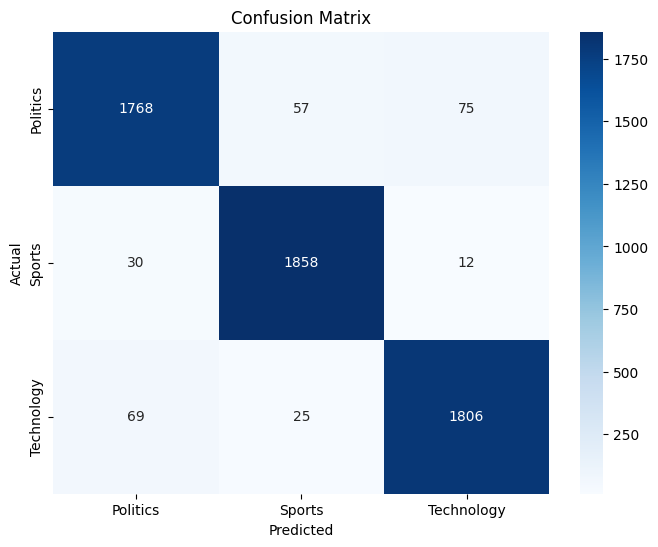

In [11]:
# Make predictions
y_pred = model.predict(X_test)

# 1. Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

# 2. Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Create a DataFrame to compare Actual vs Predicted
results_df = test_clean.copy()
results_df['predicted'] = y_pred

# Filter for rows where the prediction was WRONG
errors = results_df[results_df['label_name'] != results_df['predicted']]

# Show 5 random errors
print("Top 5 Misclassified Examples:")
for i, row in errors.sample(5, random_state=42).iterrows():
    print(f"\n--- Example {i} ---")
    print(f"Text: {row['text'][:200]}...") # Print first 200 chars
    print(f"Actual: {row['label_name']}")
    print(f"Predicted: {row['predicted']}")

Top 5 Misclassified Examples:

--- Example 2046 ---
Text: Cowboys Defeat Redskins 21-18 LANDOVER, Md. - Bill Parcells celebrated the touchdown with a big smile and his fist thrust high in the air......
Actual: Politics
Predicted: Sports

--- Example 4293 ---
Text: GAME UNDER FIRE Attacking police officers, racial slurs, bloody beatings of innocent bystanders ... is it really just a game? In four and a half minutes, 14-year-old Ryan Mason ran over a police offic...
Actual: Technology
Predicted: Sports

--- Example 442 ---
Text: Site security gets a recount at Rock the Vote Grassroots movement to register younger voters leaves publishing tools accessible to outsiders....
Actual: Technology
Predicted: Politics

--- Example 2517 ---
Text: Stern to Join Sirius Satellite Radio NEW YORK - Howard Stern has long had two words for the Federal Communications Commission - and in 15 months, he can finally utter them on the air.    The self-proc...
Actual: Politics
Predicted: Technology

--- Example